In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from calendar import monthrange

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


In [11]:
# Read csv file, convert time to datetime data type
df = pd.read_csv('flex_networks.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], infer_datetime_format=True)

In [12]:
# Predictors are DoW and HoD
times = df['Timestamp']
DoW = []
HoD = []
MoY = []

for x in times:
    DoW.append(x.weekday())
    HoD.append(x.hour)
    MoY.append(x.month)

df['DoW'] = DoW
df['HoD'] = HoD
#df['MoY'] = MoY

df['crawford_pers_forecast'] = df['crawfordCrescent_F3'].shift(336, axis=0)
df['crawford_pers_forecast_1day'] = df['crawfordCrescent_F3'].shift(48, axis=0)

In [13]:
targetColumns = list(df.columns[1:4]) + list(df.columns[5:19]) + list(df.columns[21:22])
#predictors = list(df.columns[23:32])

predictors = ['DoW', 'HoD']
df[predictors] = df[predictors]/df[predictors].max()

In [21]:
df[targetColumns].mean(axis=0)

kinnessPark_F4          6.134649
kinnessPark_F3          8.578138
kinnessPark_F2         25.545085
hallowhill_F4           2.252953
hallowhill_F3           3.531430
hallowhill_F2           8.992310
hallowhill_F1          24.386270
crawfordCrescent_F5     7.439726
crawfordCrescent_F4    22.613242
crawfordCrescent_F3    19.588161
crawfordCrescent_F2     8.153058
crawfordCrescent_F1    15.146345
craigtounCaravan_F1    18.642719
bobbyJones_F4           9.976746
bobbyJones_F3          17.638679
bobbyJones_F2          44.748016
bobbyJones_F1          17.519092
baloneFarm_F1          10.573219
dtype: float64

In [20]:
# month = 7

# X = df[predictors].loc[df['MoY'] == month].values
# y = df[targetColumn].loc[df['MoY'] == month].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
# print(X_train.shape)
# print(X_test.shape)

(1041, 3)
(447, 3)


In [14]:
X = np.split(df[predictors].values, [336,7247,8687])
y = np.split(df[targetColumns].values, [336,7247,8687])

X_train = X[1]
X_test = X[2]
y_train = y[1]
y_test = y[2]

print(X_train.shape)
print(X_test.shape)

(6911, 2)
(1440, 2)


In [15]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.coef_

array([[  0.84373008,   6.83800826],
       [  0.61662255,   8.19291779],
       [  2.07667522,  13.38787842],
       [  0.07289587,   2.20248248],
       [  0.04673938,   3.63545347],
       [  0.19674171,   9.38064224],
       [  2.9145993 ,  24.77573641],
       [  0.27473595,   7.71174962],
       [  0.70608406,  20.84178932],
       [  1.96270446,  21.64492609],
       [  0.61319584,   8.32825783],
       [  0.90429255,  17.29565318],
       [  8.00606125,  10.34720938],
       [  0.30969563,   9.43493173],
       [  1.77215386, -21.76916035],
       [ -0.09709283,   2.36184472],
       [  0.89746865,  19.99394789],
       [  0.54483516,  10.09477181]])

6.377034498975892
1312507336227.5618
inf


d:\Programs\Python\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


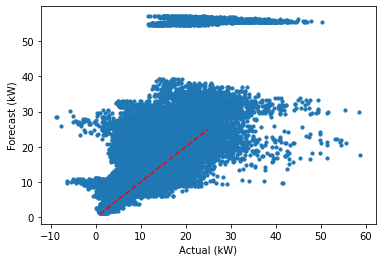

In [18]:
y_pred = np.ravel(reg.predict(X_test))
y_real = np.ravel(y_test)
print(mean_absolute_error(y_real, y_pred))
print(mean_absolute_percentage_error(y_real, y_pred))

print(np.mean(np.abs((y_real - y_pred) / y_real)) * 100)

plt.scatter(y_real, y_pred, s=10)
plt.plot([1,25], [1,25], c="r",ls="--")
plt.xlabel("Actual (kW)")
plt.ylabel("Forecast (kW)")
#plt.savefig("linear.jpg", dpi=300)
plt.show()

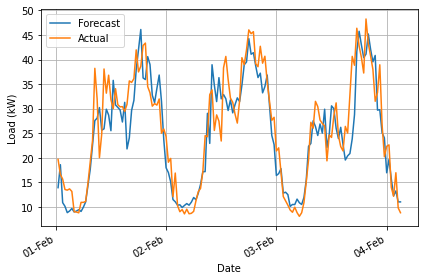

In [27]:
l = 1488
h = 1488 + 150

febPred = reg.predict(df[predictors].iloc[l:h])

fig, ax = plt.subplots()
ax.plot(df["Timestamp"].iloc[l:h], febPred, label="Forecast")
ax.plot(df["Timestamp"].iloc[l:h], df["crawfordCrescent_F3"].iloc[l:h], label="Actual")
# Major ticks every day
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.grid(True)
# Set labels to day number - month name
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax.set_ylabel("Load (kW)")
ax.set_xlabel("Date")
ax.legend()

plt.tight_layout()
#plt.savefig("pers_forecast.jpg", dpi=300, bbox_inches="tight")
plt.show()